In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
ls

Keşifsel Veri Analizi ve Veri Ön İşleme .ipynb
Keşifsel Veri Analizi ve Veri Ön İşleme.html
Keşifsel Veri Analizi ve Veri Ön İşleme -Copy1.ipynb
kc_house_data.csv
İpek_Kesifsel_Veri_Analizi-Copy1.ipynb
İpek_Kesifsel_Veri_Analizi.ipynb


In [2]:
house=pd.read_csv("kc_house_data.csv")

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<AxesSubplot:>

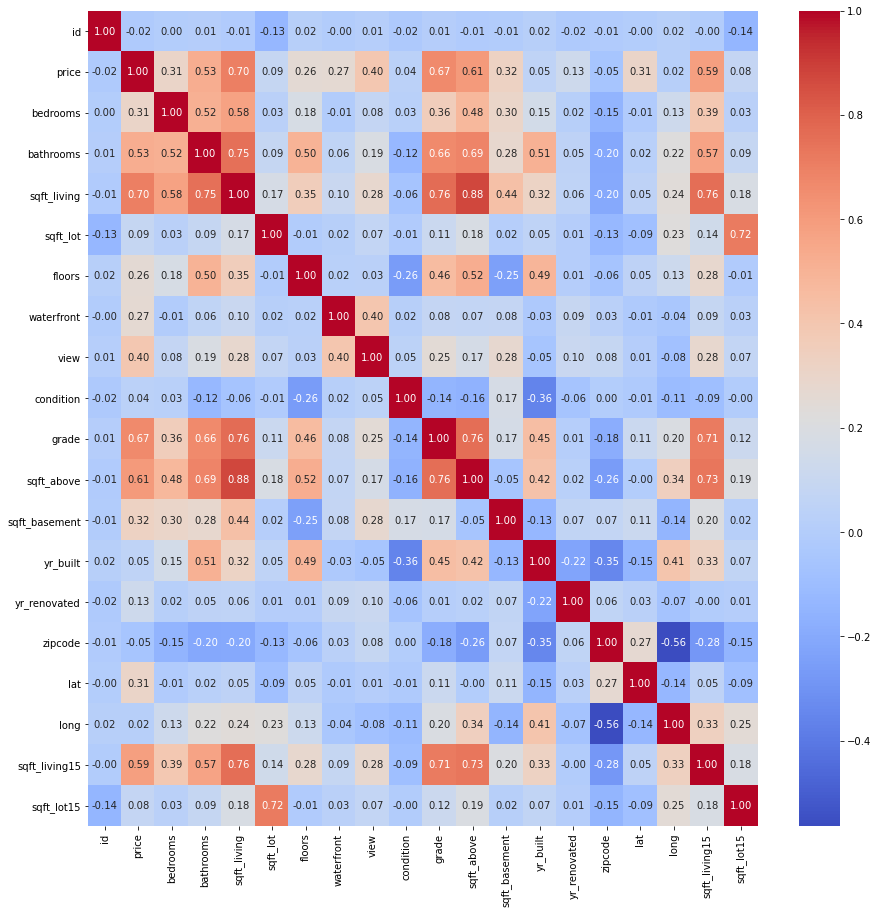

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(house.corr(), annot=True, fmt=".2f", cmap="coolwarm")

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

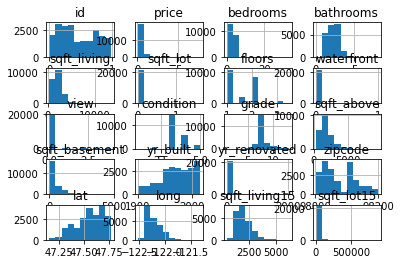

In [12]:
house.hist()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

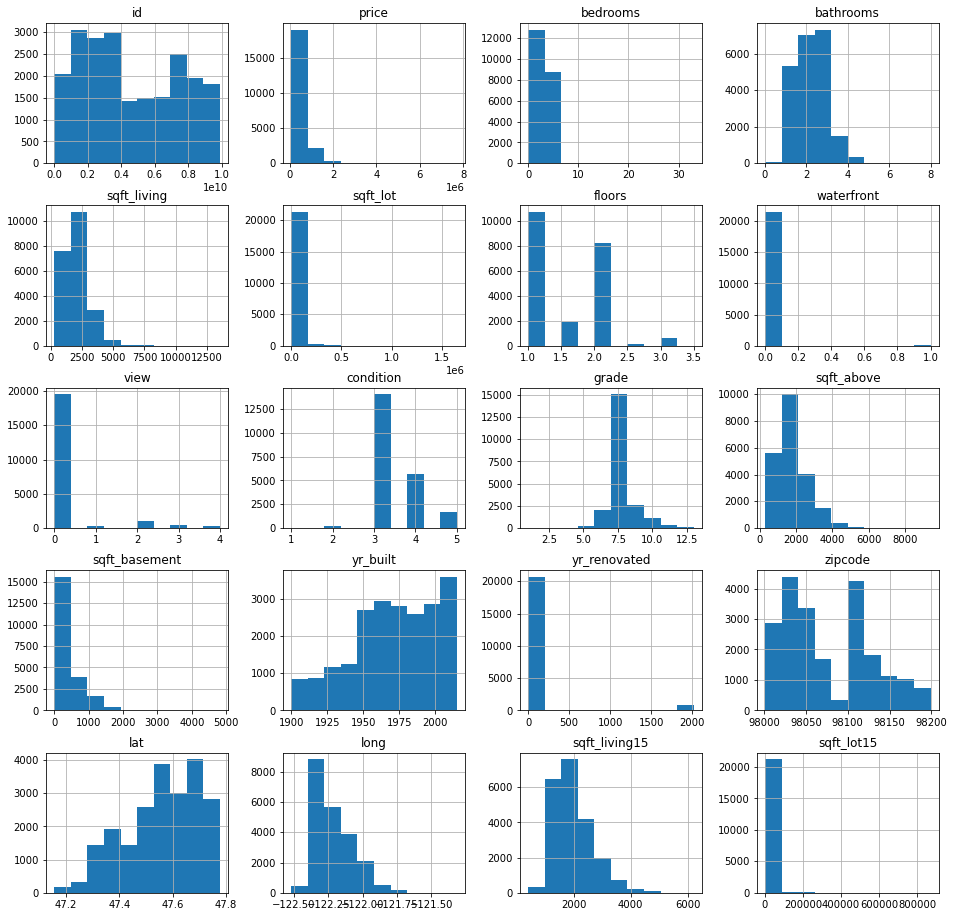

In [13]:
house.hist(figsize=(16,16))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

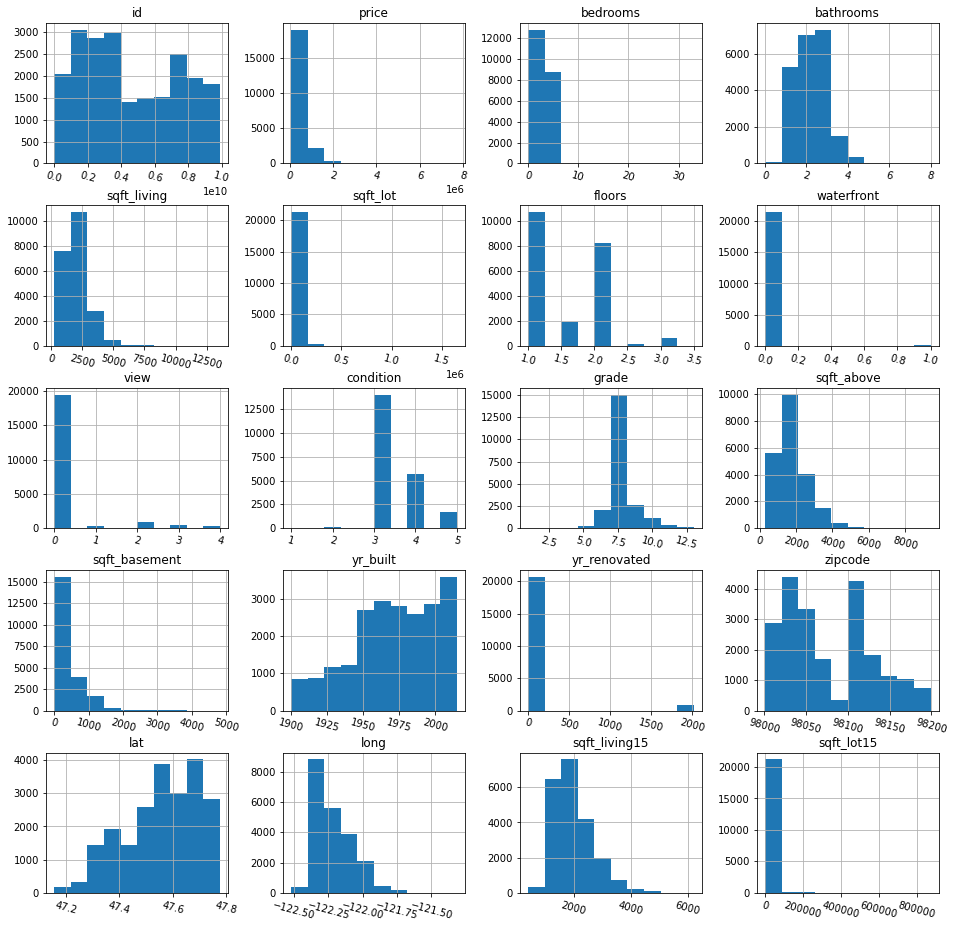

In [14]:
house.hist(figsize=(16,16), xrot=-15)

<AxesSubplot:>

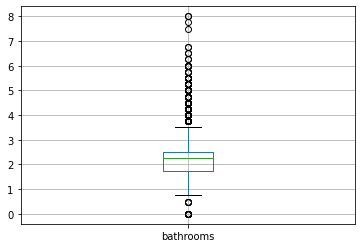

In [21]:
house.boxplot("bathrooms") #outliers boxplotta daha iyi görüntülenir.

<AxesSubplot:>

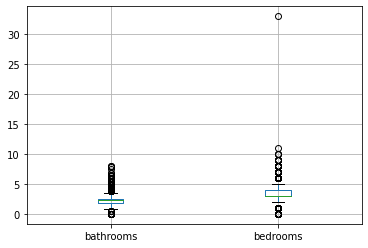

In [23]:
house.boxplot(["bathrooms","bedrooms"]) #outliers boxplotta daha iyi görüntülenir.

<AxesSubplot:>

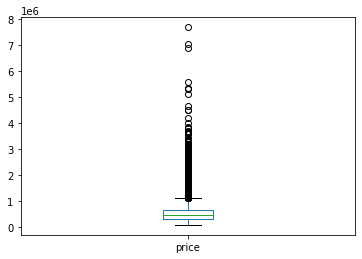

In [24]:
house.price.plot(kind="box")

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

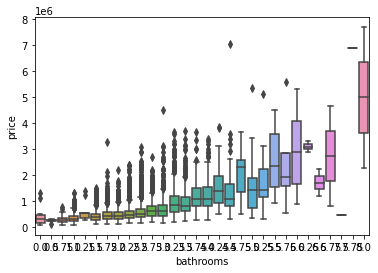

In [27]:
sns.boxplot(x=house["bathrooms"], y=house["price"])

In [34]:
house.groupby("bathrooms")["id"].count()

bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: id, dtype: int64

In [37]:
house.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

(0.0, 2000000.0)

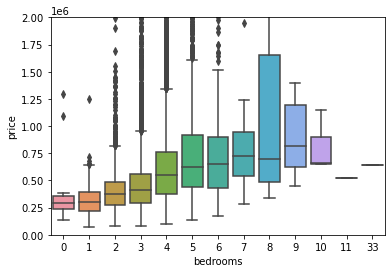

In [40]:
sns.boxplot(x=house["bedrooms"], y=house["price"])
plt.ylim(0,2e6)

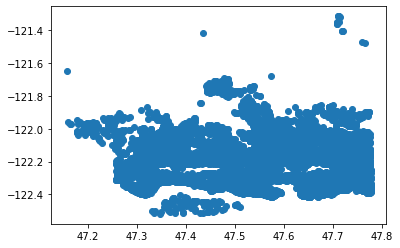

In [42]:
plt.scatter(house.lat,house.long)

In [43]:
house.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

(0.0, 2000000.0)

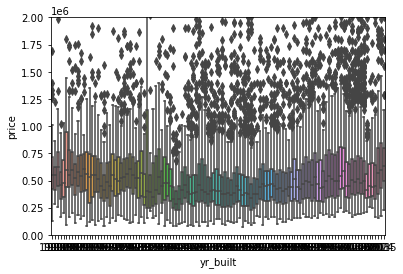

In [48]:
sns.boxplot(x=house["yr_built"], y=house["price"])
plt.ylim(0,2e6)

(0.0, 2000000.0)

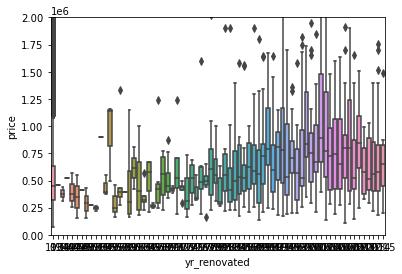

In [49]:
sns.boxplot(x=house["yr_renovated"], y=house["price"])
plt.ylim(0,2e6)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

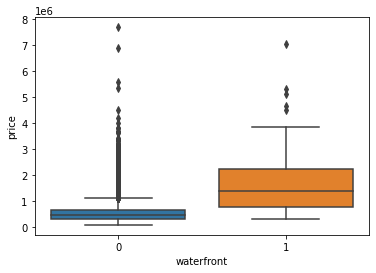

In [51]:
sns.boxplot(x=house["waterfront"], y=house["price"])

# T-TEST
ttest_ind değişknelerin birbirne göre durumu
ttest_1samp tek değişkenin durumu


In [63]:
from scipy.stats import ttest_ind, ttest_1samp , f_oneway

In [56]:
ttest_1samp(house.price,545000) #p_value 0.05 ten küçükse Ho ı reddederim

Ttest_1sampResult(statistic=-1.9669204356127465, pvalue=0.049205157561202396)

In [57]:
ttest_1samp(house.price,544000) #p_value 0.05 ten büyükse Ho ı reddedemem Ho=544000 diyordu

Ttest_1sampResult(statistic=-1.5664771935399855, pvalue=0.11725158441536408)

In [58]:
print(house.price.mean())

540088.1417665294


## pvalue=0 old için Ho yani waterfront
olanlarla olmayanların fiyatı eşittir hipotezini reddederim.

In [60]:
ttest_ind(house.price[house.waterfront==0],house.price[house.waterfront==1]) #iki değişkenin birbirine göre durumu

Ttest_indResult(statistic=-40.62589119977304, pvalue=0.0)

## Gruplar 2'den fazla olursa nasıl kıyaslayacağız? ANOVA Testi
f_oneway

In [62]:
house.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [70]:
floor = house.groupby(["floors"])["price"].apply(list)

In [71]:
floor

floors
1.0    [221900.0, 180000.0, 604000.0, 510000.0, 12250...
1.5    [310000.0, 530000.0, 485000.0, 233000.0, 66700...
2.0    [538000.0, 257500.0, 323000.0, 650000.0, 39500...
2.5    [1385000.0, 2250000.0, 930000.0, 405600.0, 379...
3.0    [280000.0, 549000.0, 518500.0, 675000.0, 51995...
3.5    [1095000.0, 435000.0, 544000.0, 525000.0, 4790...
Name: price, dtype: object

<AxesSubplot:xlabel='floors', ylabel='price'>

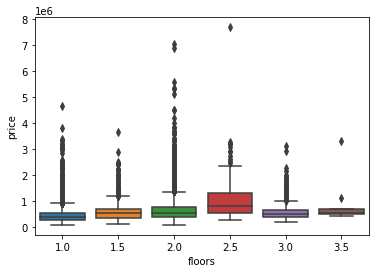

In [72]:
sns.boxplot(x=house.floors, y= house.price)

In [74]:
f_oneway(floor[1.0],floor[1.5],floor[2.0],floor[2.5],floor[3.0],floor[3.5])

F_onewayResult(statistic=399.55946235775593, pvalue=0.0)

evet en az biri farklı bunu bulduk ama hangisi farklı? 2'li karşılaştırma yapmamız lazım --- tukey

In [81]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [83]:
mdl = pairwise_tukeyhsd(house["price"],house["floors"])
mdl.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,1.5,116800.0103,0.001,91928.1672,141671.8535,True
1.0,2.0,206710.5307,0.001,192031.6185,221389.443,True
1.0,2.5,618165.8581,0.001,538672.0095,697659.7067,True
1.0,3.0,140345.4066,0.001,98765.2408,181925.5723,True
1.0,3.5,491131.8674,0.0011,137040.7615,845222.9734,True
1.5,2.0,89910.5204,0.001,64486.4438,115334.597,True
1.5,2.5,501365.8478,0.001,419206.3372,583525.3583,True
1.5,3.0,23545.3962,0.675,-22928.5039,70019.2963,False
1.5,3.5,374331.8571,0.0316,19632.7952,729030.919,True
2.0,2.5,411455.3274,0.001,331786.9707,491123.684,True


1.5 ile 3 arasında fark yok mesela (False)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
X=pd.DataFrame(house["condition"])
y=house.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
mean_squared_error(y_test, ypred)
r2_score(y_test, ypred)

0.0016928505487897594

X_train üzerinden contidion datasını düzenleyin ????????   R2'yi daha iyi hale getirmeye çalışıyormuşuz.

In [110]:
X_train.groupby("condition")

In [106]:
house.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [112]:

mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
r2_score(y_test, ypred)

0.0016928505487897594

In [113]:
mdl = pairwise_tukeyhsd(y_train,X_train["condition"], alpha=0.05)
mdl.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-32741.4787,0.9,-252499.822,187016.8647,False
1,3,176723.0008,0.1158,-24271.0487,377717.0503,False
1,4,156933.7577,0.2089,-44423.2689,358290.7843,False
1,5,231463.159,0.0159,28697.908,434228.41,True
2,3,209464.4794,0.001,119510.2231,299418.7358,True
2,4,189675.2363,0.001,98912.8408,280437.6319,True
2,5,264204.6377,0.001,170359.5136,358049.7617,True
3,4,-19789.2431,0.0292,-38301.1561,-1277.3302,True
3,5,54740.1582,0.001,24544.3674,84935.9491,True
4,5,74529.4014,0.001,42005.1028,107053.6999,True


1-2, 1-3, 1-4 arasında fark yok, diğerlerinde var. 1-2'yi gruplayabiliriz gibi duruyor

In [114]:
X_train.loc[X_train["condition"] == 1,"condition"] = 2
X_test.loc[X_test["condition"]==1,"condition"] = 2

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [115]:
mdl = pairwise_tukeyhsd(y_train,X_train["condition"], alpha=0.05)
mdl.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2,3,204045.2002,0.001,126563.4833,281526.9171,True
2,4,184255.9571,0.001,105942.8145,262569.0997,True
2,5,258785.3585,0.001,177313.2837,340257.4332,True
3,4,-19789.2431,0.0186,-37223.258,-2355.2283,True
3,5,54740.1582,0.001,26302.5858,83177.7307,True
4,5,74529.4014,0.001,43898.9038,105159.8989,True


artık tüm gruplar arasında fark görünüyor, r2'e bakalım ne olmuş?

In [116]:
mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
r2_score(y_test, ypred)

0.001594074263682299

(0.0, 2000000.0)

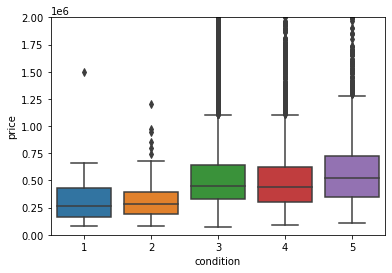

In [117]:
sns.boxplot(x=house["condition"],y=house["price"])
plt.ylim(0,2e6)

aslında 1-2 ile 3-4 gruplanabilir

In [118]:
house.groupby("condition")["price"].mean()

condition
1    334431.666667
2    327287.145349
3    542012.578148
4    521200.390033
5    612418.089359
Name: price, dtype: float64

In [119]:
X_train.loc[X_train["condition"] <= 2,"condition"] = 1
X_train.loc[(X_train["condition"] > 2) & (X_train["condition"] <= 4),"condition"] = 2
X_train.loc[X_train["condition"] == 5,"condition"] = 3

X_test.loc[X_test["condition"] <= 2,"condition"] = 1
X_test.loc[(X_test["condition"] > 2) & (X_test["condition"] <= 4),"condition"] = 2
X_test.loc[X_test["condition"] == 5,"condition"] = 3

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

şimdi r2'ye bakalım, ne oldu? Yükseldi EVET

In [120]:
mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
r2_score(y_test, ypred)

0.00737698248012042

In [121]:
mdl.coef_  #beta1 yani condition'ın durumu 1 birim artarsa 77362 kadar artıyor fiyat

array([77362.29220072])

In [123]:
mdl.intercept_ #beta0 condition'dan bağımsız başlangıç fiyatı 377577 

377577.08437656134

0 en kötü 1 en iyi R2'dir, linear regression'da 0-1 arasındadır

# Linear Model

In [125]:
from statsmodels.formula.api import ols

In [128]:
mdl = ols("price ~ condition", data=house).fit()  #önce bağımlı tildadan (ALTGR+Ü) sonrakiler bağımsız

In [127]:
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.61
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           8.94e-08
Time:                        13:52:10   Log-Likelihood:            -3.0759e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.701e+05   1.33e+04     35.318      0.000    4.44e+05    4.96e+05
condition   2.051e+04   3835.149      5.349      0.000     1.3e+04     2.8e+04
==============================================================================
Omnibus:                    19132.424   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1140517.838
Skew:                           4.026   Prob(JB):                         0.00
Kurtosis:                      37.665   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r2 = 1-(sse/sst) --- yani 1-(hatalar toplam/varyanslar toplam)

r2= 1- [(yi-y_hat)^2/(yi-y_ort)^2]   ---- ortalamadan sapma varyansı verir

ADJ R2 ise değişken sayısına göre değişir. Değişken sayısına göre overfit olduğunda artar, bazen negatif olabilir. 

r2'nin negatif olması varyanstan bile daha fazla hata yaptığımızı söylüyor ve modelin çok kötü olduğunu gösterir.

r2 1'e ne kadar yakınsa o kadar iyidir.

In [129]:
mdl= ols("price ~ C(view)", data=house).fit()  #kategorik olduğunu belirtmek için C() yapıyoruz

In [131]:
mdl.summary() #R2 arttı bayağı etkiliymiş

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1093.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:            -3.0561e+05
No. Observations:               21613   AIC:                         6.112e+05
Df Residuals:                   21608   BIC:                         6.113e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.966e+05   2398.613    207.021      0.000    4.92e+05    5.01e+05
C(view)[T.1]  3.157e+05   1.85e+04     17.035      0.000    2.79e+05    3.52e+05
C(view)[T.2]  2.958e+05   1.11e+04     26.763      0.000    2.74e+05    3.18e+05
C(view)[T.3]  4.754e+05    1.5e+04     31.651      0.000    4.46e+05    5.05e+05
C(view)[T.4]  9.671e+05   1.89e+04     51.169      0.000     9.3e+05       1e+06
==============================================================================
Omnibus:                    17754.706   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1025898.441
Skew:                           3.567   Prob(JB):                         0.00
Kurtosis:                      35.990   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

View için 4 tane dummy değişken oluşturdu, sıralayıp (genelde alfabetik) ilkini base alıyor. O yüzden 5 yerine 4 tane dummy değişken oluşturdu.  Sıfırıncı view base oldu / ref oldu.

Buradaki sonuçlar base'e göre anlamlılığı ifade eder, P'ler için base'e göre(referansa göre) değişimi anlamlı denebilir. Ama 3 ile 4 arasında nasıl bir bağ var bilemeyiz, base değişmeli ya da 2'li bakman gerekir.

In [132]:
mdl= ols("price ~ C(waterfront)", data=house).fit()  #kategorik olduğunu belirtmek için C() yapıyoruz

In [133]:
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1650.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:19:33   Log-Likelihood:            -3.0681e+05
No. Observations:               21613   AIC:                         6.136e+05
Df Residuals:                   21611   BIC:                         6.136e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.316e+05   2416.194    220.000      0.000    5.27e+05    5.36e+05
C(waterfront)[T.1]   1.13e+06   2.78e+04     40.626      0.000    1.08e+06    1.18e+06
==============================================================================
Omnibus:                    17750.357   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           924317.834
Skew:                           3.605   Prob(JB):                         0.00
Kurtosis:                      34.215   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

waterfront kategorik ve var/yok şeklinde değişiyor, bu değişken için 1 tane dummy değişken oluşturdu. Yani varsa beta1 kadar artır olur anlamına gelir.

In [134]:
mdl= ols("price ~ condition", data=house).fit() 
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.61
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           8.94e-08
Time:                        15:29:54   Log-Likelihood:            -3.0759e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.701e+05   1.33e+04     35.318      0.000    4.44e+05    4.96e+05
condition   2.051e+04   3835.149      5.349      0.000     1.3e+04     2.8e+04
==============================================================================
Omnibus:                    19132.424   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1140517.838
Skew:                           4.026   Prob(JB):                         0.00
Kurtosis:                      37.665   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
mdl= ols("price ~ condition + floors", data=house).fit()  #ekstra değişken eklersem modeli geliştirmiş olurum, r2 yükselir
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     908.9
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:30:54   Log-Likelihood:            -3.0673e+05
No. Observations:               21613   AIC:                         6.135e+05
Df Residuals:                   21610   BIC:                         6.135e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.402e+04   1.64e+04      2.070      0.038    1803.730    6.62e+04
condition   6.312e+04   3821.209     16.518      0.000    5.56e+04    7.06e+04
floors      1.947e+05   4604.956     42.270      0.000    1.86e+05    2.04e+05
==============================================================================
Omnibus:                    19470.951   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1302332.766
Skew:                           4.099   Prob(JB):                         0.00
Kurtosis:                      40.134   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
col_names=list(house.drop(["price","date","id"], axis=1))

In [144]:
"+".join(col_names)

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'

In [146]:
formula= "+".join(col_names)
mdl= ols("price ~ "+ formula, data=house).fit() #tüm değişkenleri analiz için 
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:38:13   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4405      2.270     48.661      0.000     105.992     114.889
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7876      2.253     31.415      0.000      66.371      75.204
sqft_basement    39.6600      2.647     14.985      0.000      34.473      44.848
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     4.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###### Değişkenler arasındaki korelasyon modeli bozar, mümkün olduğunda aralarında ilişki olmamasını isteriz. İstatistiksel olarak bazı değişkenler modeli desteklemiyorsa aralarında korelasyon olabilir.

floors biraz bozuyor gibi, diğerleri anlamlı görünüyor.

coeff işareti de önemli, mesela bedroom arttıkça fiyat azalması anlamsız gibi duruyor

In [148]:
X=house.drop(["price","date","id"], axis=1)
y=house.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
#mean_squared_error(y_test, ypred)
r2_score(y_test, ypred)

0.6994627057969842

In [150]:
X=house.drop(["price","date","id","zipcode","lat","long"], axis=1)
y=house.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
#mean_squared_error(y_test, ypred)
r2_score(y_test, ypred)

0.652770305676127

<AxesSubplot:>

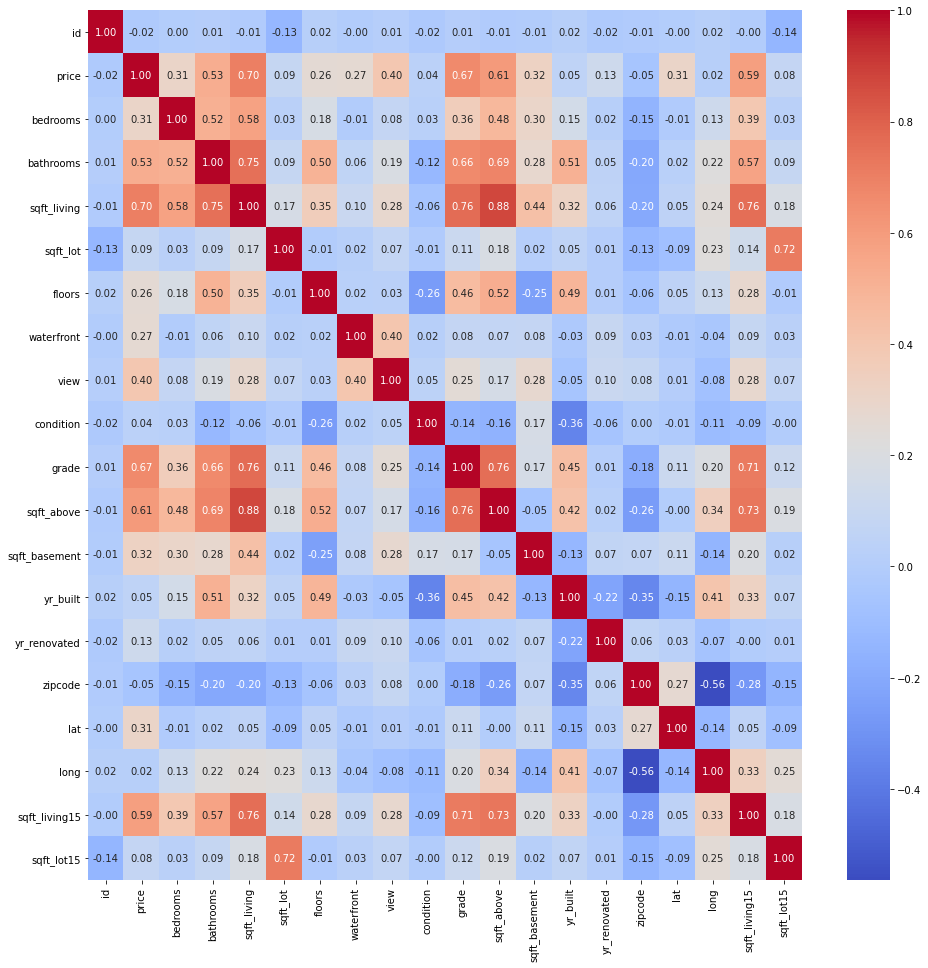

In [154]:
#korelasyon heatmap
plt.figure(figsize=(16,16))
sns.heatmap(house.corr(), annot=True, cmap="coolwarm", fmt=".2f")

Modelleri nedeyip en yüksek r2 yi nasıl elde edersin, dene bakalım??????

In [160]:
X=house.drop(["price","date","id","zipcode","long","sqft_lot","sqft_lot15","condition","yr_built","yr_renovated"], axis=1)
y=house.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
#mean_squared_error(y_test, ypred)
r2_score(y_test, ypred)

0.6545061842269315

In [166]:
X=house.drop(["price","date","id","zipcode","long","sqft_lot","sqft_lot15","yr_built","sqft_living15","yr_renovated","bathrooms"], axis=1)
y=house.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
#mean_squared_error(y_test, ypred)
r2_score(y_test, ypred)

0.6652976935726944

In [183]:
col_names=list(house.drop(["price","date","id","sqft_lot","sqft_living15","sqft_lot15"], axis=1))
formula= "+".join(col_names)
mdl= ols("price ~ "+ formula, data=house).fit() #tüm değişkenleri analiz için 
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3580.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:19   Log-Likelihood:            -2.9464e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21598   BIC:                         5.894e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       8.92e+06   2.87e+06      3.106      0.002    3.29e+06    1.45e+07
bedrooms      -3.525e+04   1886.508    -18.683      0.000   -3.89e+04   -3.15e+04
bathrooms      4.106e+04   3255.522     12.611      0.000    3.47e+04    4.74e+04
sqft_living     114.2455      2.121     53.852      0.000     110.087     118.404
floors         5211.8580   3569.436      1.460      0.144   -1784.501    1.22e+04
waterfront     5.793e+05   1.74e+04     33.337      0.000    5.45e+05    6.13e+05
view           5.472e+04   2114.164     25.882      0.000    5.06e+04    5.89e+04
condition      2.566e+04   2352.717     10.904      0.000     2.1e+04    3.03e+04
grade          9.992e+04   2065.792     48.370      0.000    9.59e+04    1.04e+05
sqft_above       74.2253      2.130     34.847      0.000      70.050      78.400
sqft_basement    40.0193      2.649     15.106      0.000      34.827      45.212
yr_built      -2633.2249     72.654    -36.243      0.000   -2775.633   -2490.817
yr_renovated     18.3920      3.655      5.031      0.000      11.227      25.557
zipcode        -603.2779     32.883    -18.346      0.000    -667.731    -538.825
lat            6.084e+05   1.07e+04     56.821      0.000    5.87e+05    6.29e+05
long          -2.112e+05   1.28e+04    -16.547      0.000   -2.36e+05   -1.86e+05
==============================================================================
Omnibus:                    18145.986   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1762147.238
Skew:                           3.504   Prob(JB):                         0.00
Kurtosis:                      46.677   Cond. No.                     4.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [186]:
house.dtypes #değişkenlerin tiplerinde view katerogik olmasına rağmen sayı, onu dummy olarak elmeliyiz

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [184]:
house_new = pd.get_dummies(house, columns=["view"], prefix="view", drop_first=True)
house_new.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'view_1', 'view_2', 'view_3', 'view_4'],
      dtype='object')

In [229]:
X=house_new.drop(["price","date","id","zipcode","long","sqft_lot","sqft_lot15","condition","yr_built","yr_renovated"], axis=1)
y=house_new.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

mdl=LinearRegression()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)
#mean_squared_error(y_test, ypred)
r2_score(y_test, ypred)

0.6563860426178793

### MAX 0.7 Bulabildim

In [192]:
col_names=list(house_new.drop(["price","date","id","sqft_lot","sqft_living15","sqft_lot15"], axis=1))
formula= "+".join(col_names)
mdl= ols("price ~ "+ formula, data=house_new).fit() #tüm değişkenleri analiz için 
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2970.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:08:13   Log-Likelihood:            -2.9458e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.893e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.398e+06   2.87e+06      3.279      0.001    3.78e+06     1.5e+07
bedrooms      -3.515e+04   1881.950    -18.680      0.000   -3.88e+04   -3.15e+04
bathrooms      4.145e+04   3247.642     12.762      0.000    3.51e+04    4.78e+04
sqft_living     113.6370      2.118     53.659      0.000     109.486     117.788
floors         5853.5324   3561.294      1.644      0.100   -1126.867    1.28e+04
waterfront     5.038e+05   1.97e+04     25.604      0.000    4.65e+05    5.42e+05
condition      2.534e+04   2347.008     10.798      0.000    2.07e+04    2.99e+04
grade          9.995e+04   2060.647     48.502      0.000    9.59e+04    1.04e+05
sqft_above       74.1911      2.125     34.917      0.000      70.026      78.356
sqft_basement    39.4441      2.644     14.917      0.000      34.261      44.627
yr_built      -2654.4169     72.511    -36.607      0.000   -2796.544   -2512.290
yr_renovated     17.6645      3.647      4.843      0.000      10.516      24.813
zipcode        -601.5698     32.802    -18.340      0.000    -665.864    -537.276
lat            6.055e+05   1.07e+04     56.659      0.000    5.85e+05    6.26e+05
long          -2.074e+05   1.27e+04    -16.275      0.000   -2.32e+05   -1.82e+05
view_1         1.167e+05   1.13e+04     10.369      0.000    9.46e+04    1.39e+05
view_2         7.531e+04   6831.790     11.023      0.000    6.19e+04    8.87e+04
view_3         1.453e+05   9359.500     15.526      0.000    1.27e+05    1.64e+05
view_4         3.151e+05   1.44e+04     21.889      0.000    2.87e+05    3.43e+05
==============================================================================
Omnibus:                    18113.722   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1774735.504
Skew:                           3.490   Prob(JB):                         0.00
Kurtosis:                      46.841   Cond. No.                     4.46e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Feature Selection

en iyi K tane feature seçmeye çalışırım

In [249]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [232]:
mdl_f=f_regression(X_train, y_train)
mdl_f #1.değerler f , 2. değerler p_value
mdl_f[1]
X_train.columns[np.argsort(mdl_f[1])] #en etkili 

Index(['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15', 'view_4', 'floors',
       'waterfront', 'view_3', 'view_2', 'view_1'],
      dtype='object')

In [233]:
X_new = SelectKBest (f_regression, k=10).fit_transform(X_train,y_train)
X_train.shape

(15129, 14)

In [234]:
X_test

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,lat,sqft_living15,view_1,view_2,view_3,view_4
735,4,2.25,2070,2.0,0,8,2070,0,47.4388,2390,0,0,0,0
2830,5,3.00,2900,1.0,0,8,1830,1070,47.6784,2370,0,0,0,0
4106,4,2.50,3770,2.0,0,11,3770,0,47.5646,3710,0,1,0,0
16218,3,3.50,4560,2.0,0,12,4560,0,47.6995,4050,0,1,0,0
19964,3,2.50,2550,2.0,0,9,2550,0,47.6647,2250,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,3,2.50,2210,2.0,0,8,2210,0,47.4377,2260,0,0,0,0
14393,3,2.00,1810,1.0,0,7,980,830,47.6810,1800,0,0,0,0
6899,3,1.00,1150,1.0,0,7,1150,0,47.7270,1210,0,0,0,0
85,3,1.50,2140,2.0,0,9,1900,240,47.6337,2020,0,0,0,0


In [254]:
X=house.drop(["price","date","id"], axis=1)
y=house.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


mdl_select = SelectKBest(f_regression, k=10)
X_new = mdl_select.fit_transform(X_train,y_train)
X_new_test = mdl_select.transform(X_test)

mdl=LinearRegression()
mdl.fit(X_new,y_train)
ypred=mdl.predict(X_new_test)
r2_score(y_test, ypred)

0.6334222638085574

In [255]:
r2_scores =[]
n=X_train.shape[1]
for i in range(n):
    mdl_select = SelectKBest(f_regression, k= i+1)
    X_new = mdl_select.fit_transform(X_train,y_train)
    X_new_test = mdl_select.transform(X_test)
    
    mdl=LinearRegression()
    mdl.fit(X_new,y_train)
    ypred=mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))                 

Text(0, 0.5, 'r2_scores')

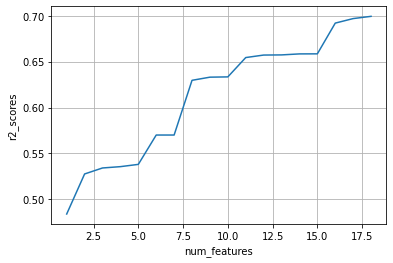

In [256]:
plt.plot(np.arange(1,n+1),r2_scores)
plt.grid(True)
plt.xlabel("num_features")
plt.ylabel("r2_scores")

In [257]:
mdl_f=mutual_info_regression(X_train,y_train)


In [258]:
ix=np.argsort(mdl_f)[::-1]

17

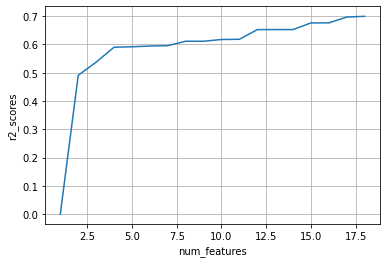

In [259]:
r2_scores =[]
n=X_train.shape[1]
for i in range(n):
    X_new=X_train.iloc[:,ix[:i+1]]
    X_new_test=X_test.iloc[:,ix[:i+1]]
    
    mdl=LinearRegression()
    mdl.fit(X_new,y_train)
    ypred=mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred)) 

plt.plot(np.arange(1,n+1),r2_scores)
plt.grid(True)
plt.xlabel("num_features")
plt.ylabel("r2_scores")
np.argmax(r2_scores)

# Diabet Datası

1
0.4811730863682816


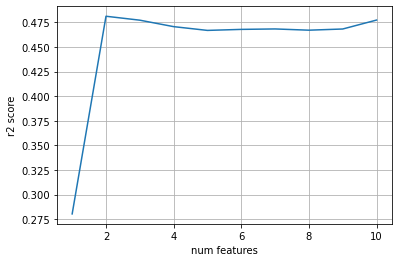

In [264]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes["data"]
y = diabetes["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

r2_scores = []
n = X_train.shape[1]
for i in range(n):
    mdl_select = SelectKBest(f_regression, k = i+1)
    X_new = mdl_select.fit_transform(X_train,y_train)
    X_new_test = mdl_select.transform(X_test)

    mdl = LinearRegression()
    mdl.fit(X_new,y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))
    
plt.plot(np.arange(1,n+1),r2_scores)
plt.grid(True)
plt.xlabel("num features")
plt.ylabel("r2 score")
r2_scores
print(np.argmax(r2_scores))
print(np.max(r2_scores))



### Diabet Mutual Info 

4
0.48247300223490297


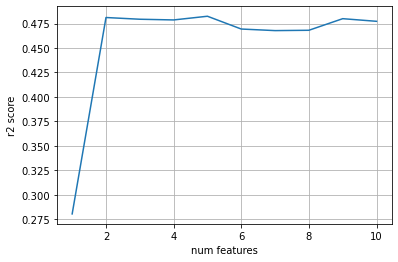

In [263]:
mdl_f = mutual_info_regression(X_train,y_train)
ix = np.argsort(mdl_f)[::-1]
r2_scores = []
n = X_train.shape[1]
for i in range(n):
    X_new = X_train[:,ix[:i+1]]
    X_new_test = X_test[:,ix[:i+1]]

    mdl = LinearRegression()
    mdl.fit(X_new,y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))
    
plt.plot(np.arange(1,n+1),r2_scores)
plt.grid(True)
plt.xlabel("num features")
plt.ylabel("r2 score")
print(np.argmax(r2_scores))
print(np.max(r2_scores))



# Recursive  Model Elimination

In [265]:
from sklearn.feature_selection import RFE

n_features_to_select=1   1 tane kalana kadar devam et

In [270]:
mdl=LinearRegression()
mdl_rfe=RFE(estimator=mdl, n_features_to_select=1, step=1)
mdl_rfe.fit(X_train,y_train)
mdl_rfe.ranking_ #en önemlisi 10.feature demek

array([10,  6,  1,  5,  3,  4,  8,  7,  2,  9])

In [271]:
ix=mdl_rfe.ranking_

9
0.47729201741573324


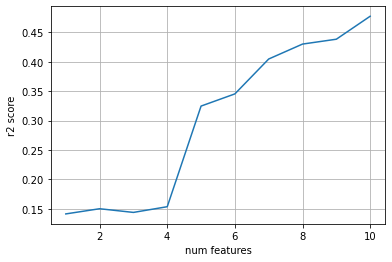

In [273]:
r2_scores = []
n = X_train.shape[1]
for i in range(n):
    X_new = X_train[:,ix[:i+1]-1]
    X_new_test = X_test[:,ix[:i+1]-1]

    mdl = LinearRegression()
    mdl.fit(X_new,y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))
    
plt.plot(np.arange(1,n+1),r2_scores)
plt.grid(True)
plt.xlabel("num features")
plt.ylabel("r2 score")
print(np.argmax(r2_scores))
print(np.max(r2_scores))

# Select From Model

In [274]:
from sklearn.feature_selection import SelectFromModel

0.48783521608902947


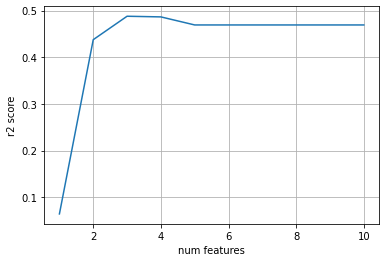

In [283]:
mdl = LinearRegression()
mdl.fit(X_train,y_train)
mdl_sfm = SelectFromModel(mdl,max_features=5)
mdl_sfm.fit(X_train,y_train)
mdl_sfm.transform(X_train)

r2_scores = []
n = X_train.shape[1]
for i in range(n):
    mdl_sfm = SelectFromModel(mdl,max_features=i+1)
    mdl_sfm.fit(X_train,y_train)
    X_new = mdl_sfm.transform(X_train)
    X_new_test = mdl_sfm.transform(X_test)

    mdl = LinearRegression()
    mdl.fit(X_new,y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))
    
plt.plot(np.arange(1,n+1),r2_scores)
plt.grid(True)
plt.xlabel("num features")
plt.ylabel("r2 score")
np.argmax(r2_scores)
print(np.max(r2_scores))

En iyi sonucu burada elde ettik

# Feature Reduction
Bundan öncekiler feature selection'dı

Principal Compnent Analysis (PCA) ---- Output yok

kordinatı x' ve y' ile kaydırıp bir eksendeki varyansı azaltıp korelasyonu ortadan kaldırabilirim. Tek bir eksene indirgeyebilir miyim? Yani tek değişkene indirgedim, örn y ekseni ile bağlantısını kesmiş oldum gibi düşünebilirsin. Bu da feature reduction

In [284]:
from sklearn.decomposition import PCA

In [287]:
mdl_pca=PCA()
mdl_pca.fit(X_train)
mdl_pca.explained_variance_ratio_

array([0.39880504, 0.14683002, 0.1249826 , 0.09710824, 0.06592378,
       0.06004328, 0.05385479, 0.04365456, 0.00784496, 0.00095273])

ilk komponent %40, ikinci %15 ini açıklıyor

In [288]:
np.cumsum(mdl_pca.explained_variance_ratio_)

array([0.39880504, 0.54563506, 0.67061766, 0.7677259 , 0.83364968,
       0.89369296, 0.94754775, 0.99120231, 0.99904727, 1.        ])

kümül toplamla bakarsan 7 tane principal komponenti alırsam %95 i açıklıyorum. yani 10 featuredan 7 sini kullanıp %5 data kaybıyla modeli açıklayabilirim

3
0.47946901282253385


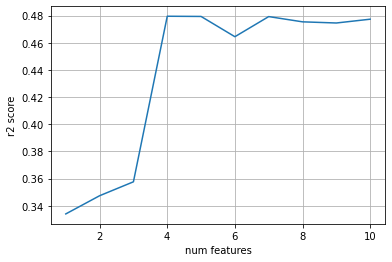

In [290]:
r2_scores = []
n = X_train.shape[1]
for i in range(n):
    mdl_pca = PCA(n_components=i+1)
    mdl_pca.fit(X_train)
    X_new = mdl_pca.transform(X_train)
    X_new_test = mdl_pca.transform(X_test)

    mdl = LinearRegression()
    mdl.fit(X_new,y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))
    
plt.plot(np.arange(1,n+1),r2_scores)
plt.grid(True)
plt.xlabel("num features")
plt.ylabel("r2 score")
print(np.argmax(r2_scores))
print(np.max(r2_scores))

sonuç olarak en iyi sonucu select from model ' den almış olduk